In [3]:
import pandas as pd
import seaborn as sb
import numpy as np
from pathlib import Path

In [6]:
PATH = Path('../WorkshopExperiments/data/')
FILENAMES = {'compatibility': 'compat_s1.csv',
             'item_data': 'items_s1.csv',
             'recs': 'recs_s1.csv'}

In [19]:
compat_df = pd.read_csv(PATH / FILENAMES['compatibility'], names=['User', 'Feature', 'Compatibility'])
item_df = pd.read_csv(PATH / FILENAMES['item_data'], names=['Item', 'Feature', 'Value'])
recs_df = pd.read_csv(PATH / FILENAMES['recs'], names=['User', 'Item', 'Rating'])

In [20]:
recs_df.head()

,User,Item,Rating
0,0,494,0.913875
1,0,353,0.858646
2,0,829,0.835495
3,0,259,0.826287
4,0,453,0.824175


In [21]:
recs_df.groupby('User').count()

,Item,Rating
User,,
0,50,50
1,50,50
2,50,50
3,50,50
4,50,50
...,...,...
1495,50,50
1496,50,50
1497,50,50


In [22]:
item_df.head()

,Item,Feature,Value
0,0,0,0
1,0,1,0
2,0,2,1
3,0,3,0
4,0,4,1


In [23]:
compat_df.head()

,User,Feature,Compatibility
0,0,0,0.519519
1,0,1,0.437017
2,0,2,0.537763
3,0,3,0.733878
4,0,4,0.568441


<AxesSubplot:xlabel='User', ylabel='Compatibility'>

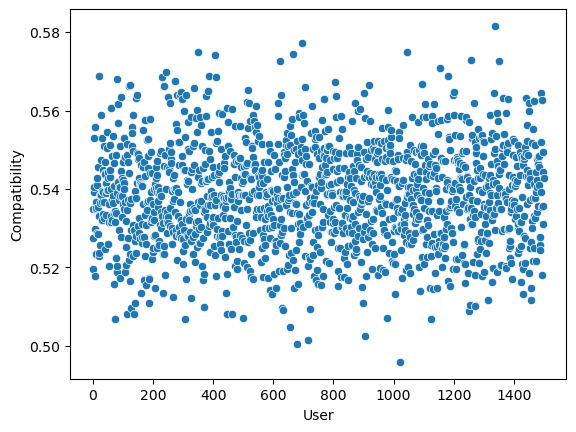

In [25]:
sb.scatterplot(x='User', y='Compatibility', data=compat_df[compat_df['Feature']==0])

<AxesSubplot:xlabel='Feature', ylabel='Compatibility'>

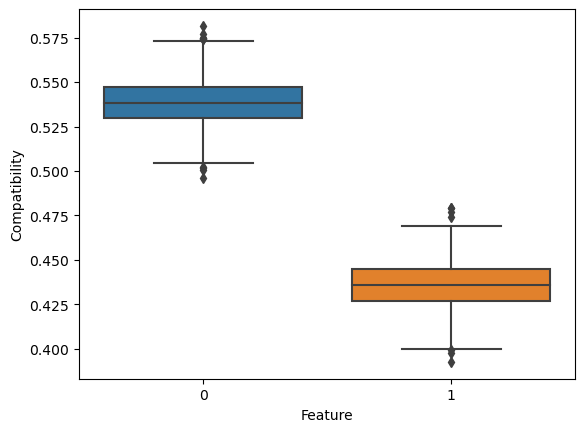

In [30]:
sb.boxplot(x='Feature', y='Compatibility', data=compat_df[(compat_df['Feature']==1) | (compat_df['Feature']==0)])

In [31]:
user0_df = recs_df[recs_df['User']==0]

In [32]:
user0_df.head()

,User,Item,Rating
0,0,494,0.913875
1,0,353,0.858646
2,0,829,0.835495
3,0,259,0.826287
4,0,453,0.824175


In [33]:
user9_df = recs_df[recs_df['User']==9]

In [34]:
user9_df.head()

,User,Item,Rating
450,9,518,1.099426
451,9,527,1.023916
452,9,453,0.979955
453,9,353,0.975102
454,9,259,0.960253


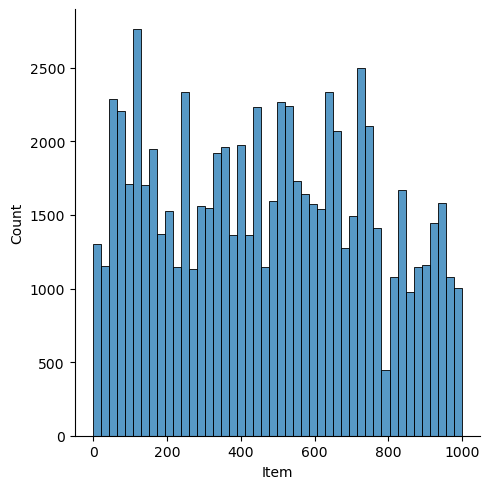

In [37]:
sb.displot(data=recs_df, x='Item')

In [38]:
user0_df[0:10]

,User,Item,Rating
0,0,494,0.913875
1,0,353,0.858646
2,0,829,0.835495
3,0,259,0.826287
4,0,453,0.824175
5,0,346,0.811478
6,0,91,0.794788
7,0,413,0.703267
8,0,195,0.689044
9,0,286,0.631667


In [39]:
user9_df[0:10]

,User,Item,Rating
450,9,518,1.099426
451,9,527,1.023916
452,9,453,0.979955
453,9,353,0.975102
454,9,259,0.960253
455,9,339,0.907208
456,9,110,0.905880
457,9,346,0.888742
458,9,569,0.841708
459,9,257,0.277894


In [45]:
feature_lookup = item_df.pivot(*item_df)
feature_lookup.head()

Feature,0,1,2,3,4,5,6,7,8,9
Item,,,,,,,,,,
0,0,0,1,0,1,0,1,1,1,0
1,0,0,1,0,1,0,1,0,0,0
2,0,0,1,1,0,0,1,1,0,0
3,0,0,1,1,0,0,0,1,1,0
4,0,0,1,0,1,0,0,1,1,0


In [48]:
recs_wide = recs_df.merge(feature_lookup, on='Item', how='inner')

In [49]:
recs_wide.head()

,User,Item,Rating,0,1,2,3,4,5,6,7,8,9
0,0,494,0.913875,1,0,1,1,0,1,1,0,1,0
1,7,494,0.715676,1,0,1,1,0,1,1,0,1,0
2,13,494,1.043510,1,0,1,1,0,1,1,0,1,0
3,20,494,1.024097,1,0,1,1,0,1,1,0,1,0
4,27,494,1.142887,1,0,1,1,0,1,1,0,1,0


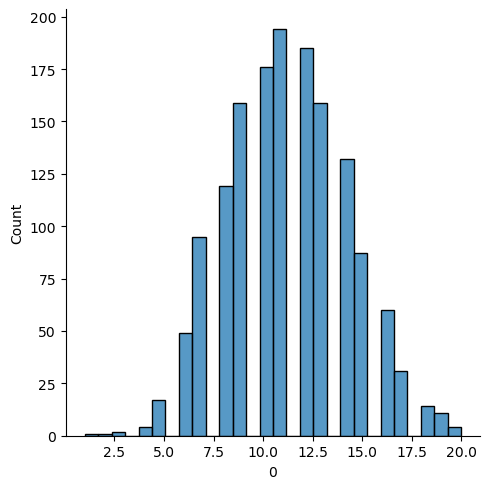

In [51]:
sb.displot(recs_wide.groupby('User')[0].sum())